In [1]:
script_root_dir = '../../'
import sys
import os
if script_root_dir not in sys.path:
    sys.path.append(script_root_dir)

import pandas as pd
from IPython.display import display, HTML

# getModelName(trial_params)
experimentName = "experiment"
if not os.path.exists(experimentName):
    os.makedirs(experimentName)
        
experiments = [{'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 32, 'n_epochs': 5000, 'learning_rate': 0.01, 'numOfTrials': 3, 'patience': 100, 'fc_width': 200, 'fc_layers': 1, 'modelType': 'blackbox', 'lambda': 0, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18'},
               {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 64, 'n_epochs': 5000, 'learning_rate': 0.01, 'numOfTrials': 3, 'patience': 100, 'fc_width': 200, 'fc_layers': 1, 'modelType': 'blackbox', 'lambda': 0, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18'},
               {'image_path': '/data/BGNN_data/INHS_cropped', 'suffix': '50_11', 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 128, 'n_epochs': 5000, 'learning_rate': 0.01, 'numOfTrials': 3, 'patience': 100, 'fc_width': 200, 'fc_layers': 1, 'modelType': 'blackbox', 'lambda': 0, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18'}]
               

a = pd.DataFrame()
a = a.append(pd.DataFrame(experiments[0], index=[0]))

display(HTML(a.to_html()))

,image_path,suffix,training_count,validation_count,batchSize,n_epochs,learning_rate,numOfTrials,patience,fc_width,fc_layers,modelType,lambda,unsupervisedOnTest,tl_model
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,32,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18


In [2]:
import helpers.TrialStatistics as TS
import random

ts = TS.TrialStatistics(experimentName)

for ex in experiments:
    for j in range(5):
        ts.addTrial(ex, {'loss': random.random()*0.1,
                        'time': random.random()*10
                       }, j)
    
ts.showStatistics(False, saveHTML=True)

raw statistics


,image_path,suffix,training_count,validation_count,batchSize,n_epochs,learning_rate,numOfTrials,patience,fc_width,fc_layers,modelType,lambda,unsupervisedOnTest,tl_model,loss,time,hash,trial
0,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,32,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.082461,5.953239,7523436566489146848,0
1,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,32,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.021058,0.703635,7523436566489146848,1
2,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,32,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.068661,0.908155,7523436566489146848,2
3,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,32,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.012028,6.268079,7523436566489146848,3
4,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,32,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.080917,3.654425,7523436566489146848,4
5,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,64,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.077561,5.660095,848752400275043240,0
6,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,64,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.025554,8.069991,848752400275043240,1
7,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,64,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.081039,6.093114,848752400275043240,2
8,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,64,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.090807,0.306134,848752400275043240,3
9,/data/BGNN_data/INHS_cropped,50_11,0.64,0.16,64,5000,0.01,3,100,200,1,blackbox,0,False,ResNet18,0.042931,6.721960,848752400275043240,4


In [3]:
ts.showStatistics(saveHTML=True)

aggregated statistics


In [4]:
import torch

a = ts.getStatistic(experiments[0],'time', 'std')
print(a)
        

2.657


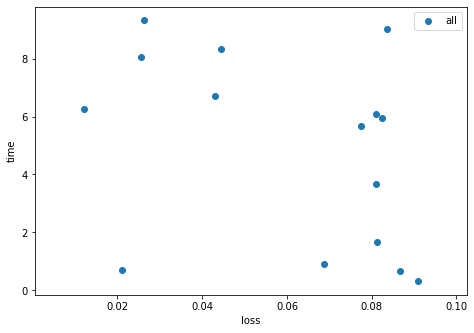

In [5]:
ts.trialScatter('loss', 'time', save_plot=True)

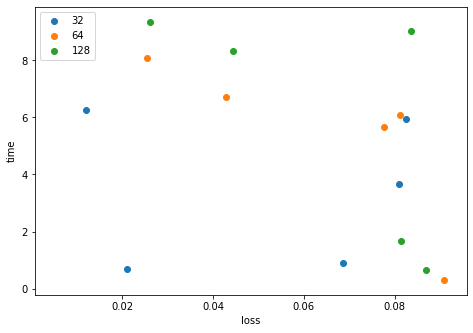

In [6]:
ts.trialScatter('loss', 'time', 'batchSize', save_plot=True)

In [7]:
ts.saveStatistics()
ts.saveStatistics(False)